In [1]:
!nvidia-smi

Tue Mar 11 11:54:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.70                 Driver Version: 572.70         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:2B:00.0  On |                  N/A |
| 34%   40C    P0             37W /  160W |     843MiB /   6144MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
print(torch.cuda.is_available())  # Deve restituire True
print(torch.cuda.device_count())  # Deve restituire almeno 1
print(torch.cuda.get_device_name(0))  # Deve mostrare "NVIDIA GeForce RTX 2060"

True
1
NVIDIA GeForce RTX 2060


# Getting the dataset from roboflow

In [ ]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("wyde").project("fingers-numbers-mobih")
version = project.version(1)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fingers-Numbers-1 in yolov11:: 100%|██████████| 2316/2316 [00:00<00:00, 2327.71it/s]


# Training con YOLO11s (dataset originale)

In [ ]:
from ultralytics import YOLO
import os

base_dir = os.getcwd()
data_yolo11s = os.path.join(base_dir, 'Fingers-Numbers-1/data.yaml') 

model = YOLO("yolo11s.pt") 
results = model.train(data= data_yolo11s, epochs=100, imgsz=640)

# Metriche modello YOLO11s split = val

In [9]:
from ultralytics import YOLO
best_weights = os.path.join(base_dir, 'runs/detect/train/weights/best.pt')
model_validation = YOLO(best_weights)  # load a custom model

# Validate the model
metrics = model_validation.val()  # no arguments needed, dataset and settings remembered
print(f'map50-95: {metrics.box.map}')  # map50-95
print(f'map50: {metrics.box.map50}')  # map50
print(f'map75: {metrics.box.map75}')  # map75
print(f'map50-95 of each category: {metrics.box.maps}')

Ultralytics 8.3.87  Python-3.12.7 torch-2.7.0.dev20250309+cu128 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
YOLO11s summary (fused): 100 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning C:\Users\david\VSC_PROJECTS\Finger_numbers_dataset\Fingers-Numbers-1\valid\labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]


                   all        185        185      0.999          1      0.995      0.944
                     2         42         42      0.999          1      0.995      0.907
                     3         45         45      0.998          1      0.995      0.963
                     4         51         51      0.998          1      0.995      0.947
                     5         47         47      0.999          1      0.995       0.96
Speed: 0.5ms preprocess, 7.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val2
map50-95: 0.9441457317031915
map50: 0.995
map75: 0.995
map50-95 of each category: [    0.94415     0.94415     0.90677     0.96344     0.94651     0.95987]


# Split = test

In [8]:
metrics_test = model_validation.val(split = 'test')
print(f'map50-95: {metrics_test.box.map}')  # map50-95
print(f'map50: {metrics_test.box.map50}')  # map50
print(f'map75: {metrics_test.box.map75}')  # map75
print(f'map50-95 of each category: {metrics_test.box.maps}')  # a list contains map50-95 of each category

Ultralytics 8.3.87  Python-3.12.7 torch-2.7.0.dev20250309+cu128 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)


val: Scanning C:\Users\david\VSC_PROJECTS\Finger_numbers_dataset\Fingers-Numbers-1\test\labels.cache... 128 images, 0 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


                   all        128        128      0.995          1      0.995      0.949
                     2         25         25      0.993          1      0.995      0.928
                     3         39         39          1          1      0.995      0.942
                     4         30         30      0.994          1      0.995      0.967
                     5         34         34      0.994          1      0.995      0.959
Speed: 0.5ms preprocess, 8.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val2
map50-95: 0.948885926264824
map50: 0.995
map75: 0.995
map50-95 of each category: [    0.94889     0.94889     0.92766     0.94213     0.96687     0.95888]


# Predict su immagini scelte nel test set


0: 640x640 1 2, 13.6ms
1: 640x640 1 2, 13.6ms
Speed: 1.7ms preprocess, 13.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


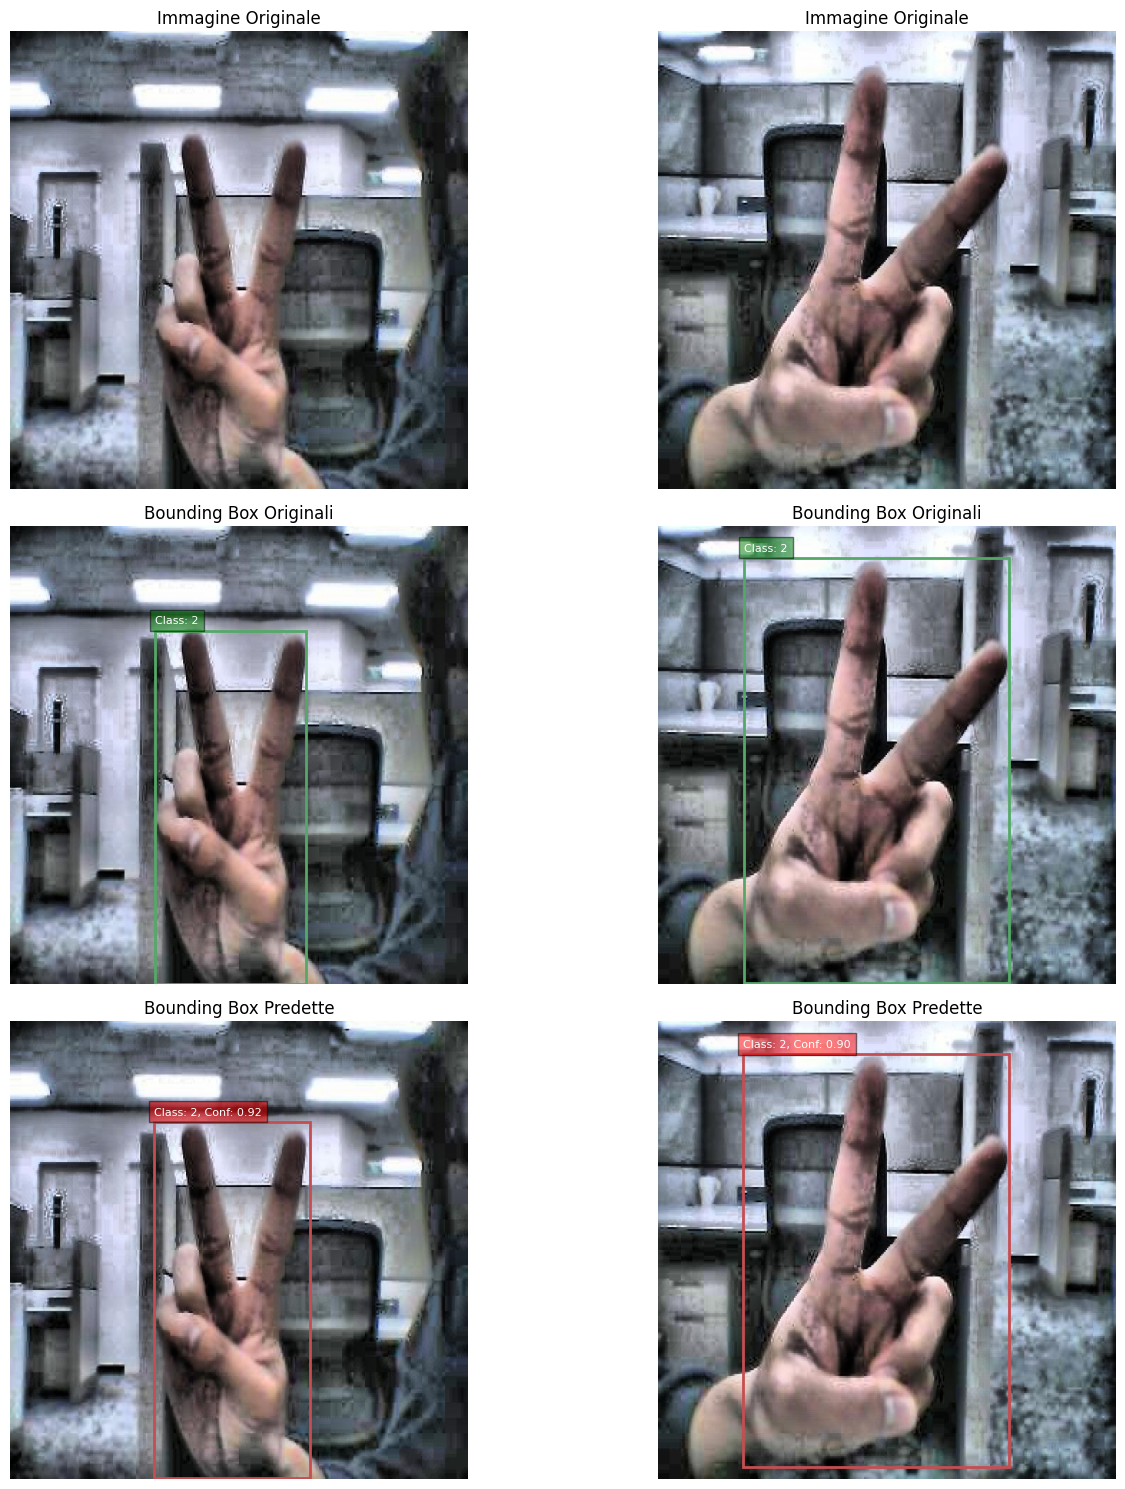

In [20]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
%matplotlib inline

# Percorsi delle immagini
image1 = os.path.join(base_dir, 'Fingers-Numbers-1/test/images/2_4_jpg.rf.b5c360bd102fad4dc25bf240e3cc4e65.jpg')
image2 = os.path.join(base_dir, 'Fingers-Numbers-1/test/images/2_8_jpg.rf.5b1652900a65a027523e45d505a0f990.jpg')
images = [image1, image2]

# Ottieni i percorsi dei file di annotazione ground truth
def get_label_path(image_path):
    # Sostituisci 'images' con 'labels' nel percorso e cambia l'estensione da jpg a txt
    return image_path.replace('images', 'labels').replace('.jpg', '.txt')

# Esegui l'inferenza
pred = model_validation.predict(images)

# Crea subplot per visualizzare le immagini
fig, axes = plt.subplots(3, len(images), figsize=(15, 15))

for i, (img_path, result) in enumerate(zip(images, pred)):
    # Carica l'immagine originale
    orig_img = Image.open(img_path)
    img_np = np.array(orig_img)
    height, width = img_np.shape[:2]
    
    # Prima riga: Immagine originale
    axes[0, i].imshow(orig_img)
    axes[0, i].set_title('Immagine Originale')
    axes[0, i].axis('off')
    
    # Seconda riga: Immagine con bounding box originali (ground truth)
    axes[1, i].imshow(orig_img)
    axes[1, i].set_title('Bounding Box Originali')
    axes[1, i].axis('off')
    
    # Carica e disegna bounding box originali
    label_path = get_label_path(img_path)
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                data = line.strip().split(' ')
                if len(data) >= 5:  # Formato YOLO: class x_center y_center width height
                    cls_id = int(data[0])
                    x_center = float(data[1]) * width
                    y_center = float(data[2]) * height
                    w = float(data[3]) * width
                    h = float(data[4]) * height
                    
                    # Converti in coordinate (x1, y1, x2, y2)
                    x1 = x_center - (w / 2)
                    y1 = y_center - (h / 2)
                    
                    # Crea un rettangolo per la bounding box originale
                    rect = patches.Rectangle((x1, y1), w, h, 
                                            linewidth=2, edgecolor='g', facecolor='none')
                    axes[1, i].add_patch(rect)
                    axes[1, i].text(x1, y1-10, f'Class: {cls_id}', 
                                   color='white', fontsize=8, 
                                   bbox=dict(facecolor='green', alpha=0.5))
    
    # Terza riga: Immagine con bounding box predette
    axes[2, i].imshow(orig_img)
    axes[2, i].set_title('Bounding Box Predette')
    axes[2, i].axis('off')
    
    # Disegna bounding box predette
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
        x1, y1, x2, y2 = box.cpu().numpy()
        width_box = x2 - x1
        height_box = y2 - y1
        confidence = conf.item()
        class_id = int(cls.item())
        
        # Crea un rettangolo per la bounding box predetta
        rect = patches.Rectangle((x1, y1), width_box, height_box, 
                                linewidth=2, edgecolor='r', facecolor='none')
        axes[2, i].add_patch(rect)
        
        # Aggiungi testo con classe e confidence
        axes[2, i].text(x1, y1-10, f'Class: {class_id}, Conf: {confidence:.2f}', 
                       color='white', fontsize=8, 
                       bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.show()

# Training del modello con nuovo dataset utilizzando i best weights di YOLO11s

# Getting del nuovo dataset da roboflow

In [ ]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("wyde").project("1-5-y1dwp-muxo0")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 1-5-3 in yolov11:: 100%|██████████| 1512/1512 [00:00<00:00, 2310.96it/s]


# Training del modello con il nuovo dataset

In [ ]:
from ultralytics import YOLO
import os

base_dir = os.getcwd()
best_weights = os.path.join(base_dir, 'runs/detect/train/weights/best.pt')

data_new = os.path.join(base_dir, '1-5-3/data.yaml')

model_new_dataset = YOLO('yolo11s.yaml').load(best_weights)

# Train the model
results_new = model_new_dataset.train(data = data_new, epochs=100, imgsz=640)

# Metriche modello sul nuovo dataset

# Split = val

In [6]:
metrics_new_val = model_new_dataset.val(split = 'val')  # no arguments needed, dataset and settings remembered
print(f'map50-95: {metrics_new_val.box.map}')  # map50-95
print(f'map50: {metrics_new_val.box.map50}')  # map50
print(f'map75: {metrics_new_val.box.map75}')  # map75
print(f'map50-95 of each category: {metrics_new_val.box.maps}')

Ultralytics 8.3.87  Python-3.12.7 torch-2.7.0.dev20250309+cu128 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)


val: Scanning C:\Users\david\VSC_PROJECTS\Finger_numbers_dataset\1-5-3\valid\labels.cache... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.71it/s]


                   all        173        173      0.995      0.999      0.995      0.941
                     1         26         26      0.993          1      0.995      0.878
                     2         60         60          1      0.996      0.995      0.904
                     3         27         27      0.995          1      0.995      0.968
                     4         28         28      0.998          1      0.995      0.967
                     5         32         32      0.989          1      0.995       0.99
Speed: 0.4ms preprocess, 7.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train2
map50-95: 0.9413335782620404
map50: 0.9949999999999999
map75: 0.9949999999999999
map50-95 of each category: [    0.87769     0.90437     0.96778     0.96672     0.99011]


# Split = test

In [4]:
from ultralytics import YOLO

# Validate the model
metrics_new = model_new_dataset.val(split = 'test')  # no arguments needed, dataset and settings remembered
print(f'map50-95: {metrics_new.box.map}')  # map50-95
print(f'map50: {metrics_new.box.map50}')  # map50
print(f'map75: {metrics_new.box.map75}')  # map75
print(f'map50-95 of each category: {metrics_new.box.maps}')

Ultralytics 8.3.87  Python-3.12.7 torch-2.7.0.dev20250309+cu128 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
YOLO11s summary (fused): 100 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning C:\Users\david\VSC_PROJECTS\Finger_numbers_dataset\1-5-3\test\labels... 53 images, 0 backgrounds, 0 corrupt: 100%|██████████| 53/53 [00:00<00:00, 819.02it/s]

val: New cache created: C:\Users\david\VSC_PROJECTS\Finger_numbers_dataset\1-5-3\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


                   all         53         53      0.991          1      0.995      0.905
                     1          2          2       0.98          1      0.995      0.852
                     2         41         41      0.999          1      0.995      0.904
                     5         10         10      0.993          1      0.995      0.961
Speed: 1.3ms preprocess, 9.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train2
map50-95: 0.9054131703582041
map50: 0.995
map75: 0.995
map50-95 of each category: [    0.85195      0.9036     0.90541     0.90541     0.96068]


# Predict su immagini scelte nel test set del nuovo dataset


0: 640x640 1 5, 17.5ms
1: 640x640 1 5, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


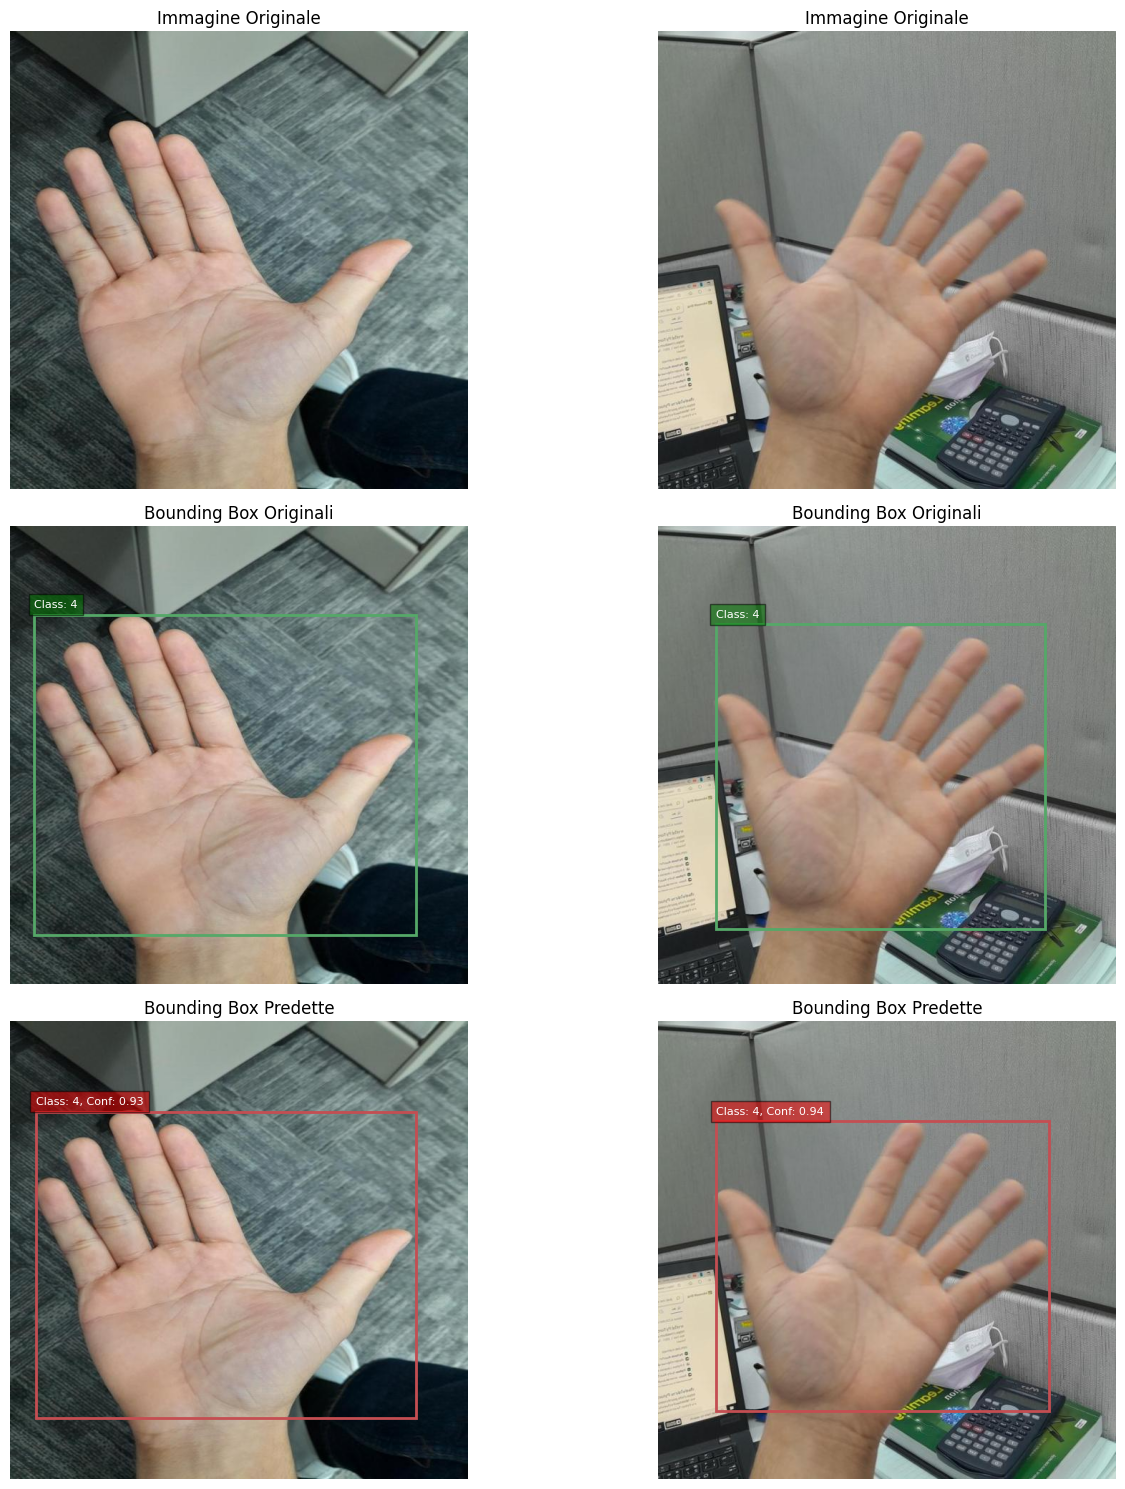

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
%matplotlib inline

# Percorsi delle immagini
image1 = os.path.join(base_dir, '1-5-3/test/images/5_154_jpg.rf.7f5198e931ea08e67d026aeb19276bbf.jpg')
image2 = os.path.join(base_dir, '1-5-3/test/images/5_168_jpg.rf.b186d2b63427c213f6163dec249ab7a3.jpg')
images = [image1, image2]

# Ottieni i percorsi dei file di annotazione ground truth
def get_label_path(image_path):
    # Sostituisci 'images' con 'labels' nel percorso e cambia l'estensione da jpg a txt
    return image_path.replace('images', 'labels').replace('.jpg', '.txt')

# Esegui l'inferenza
pred = model_new_dataset.predict(images)

# Crea subplot per visualizzare le immagini
fig, axes = plt.subplots(3, len(images), figsize=(15, 15))

for i, (img_path, result) in enumerate(zip(images, pred)):
    # Carica l'immagine originale
    orig_img = Image.open(img_path)
    img_np = np.array(orig_img)
    height, width = img_np.shape[:2]
    
    # Prima riga: Immagine originale
    axes[0, i].imshow(orig_img)
    axes[0, i].set_title('Immagine Originale')
    axes[0, i].axis('off')
    
    # Seconda riga: Immagine con bounding box originali (ground truth)
    axes[1, i].imshow(orig_img)
    axes[1, i].set_title('Bounding Box Originali')
    axes[1, i].axis('off')
    
    # Carica e disegna bounding box originali
    label_path = get_label_path(img_path)
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                data = line.strip().split(' ')
                if len(data) >= 5:  # Formato YOLO: class x_center y_center width height
                    cls_id = int(data[0])
                    x_center = float(data[1]) * width
                    y_center = float(data[2]) * height
                    w = float(data[3]) * width
                    h = float(data[4]) * height
                    
                    # Converti in coordinate (x1, y1, x2, y2)
                    x1 = x_center - (w / 2)
                    y1 = y_center - (h / 2)
                    
                    # Crea un rettangolo per la bounding box originale
                    rect = patches.Rectangle((x1, y1), w, h, 
                                            linewidth=2, edgecolor='g', facecolor='none')
                    axes[1, i].add_patch(rect)
                    axes[1, i].text(x1, y1-10, f'Class: {cls_id}', 
                                   color='white', fontsize=8, 
                                   bbox=dict(facecolor='green', alpha=0.5))
    
    # Terza riga: Immagine con bounding box predette
    axes[2, i].imshow(orig_img)
    axes[2, i].set_title('Bounding Box Predette')
    axes[2, i].axis('off')
    
    # Disegna bounding box predette
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
        x1, y1, x2, y2 = box.cpu().numpy()
        width_box = x2 - x1
        height_box = y2 - y1
        confidence = conf.item()
        class_id = int(cls.item())
        
        # Crea un rettangolo per la bounding box predetta
        rect = patches.Rectangle((x1, y1), width_box, height_box, 
                                linewidth=2, edgecolor='r', facecolor='none')
        axes[2, i].add_patch(rect)
        
        # Aggiungi testo con classe e confidence
        axes[2, i].text(x1, y1-10, f'Class: {class_id}, Conf: {confidence:.2f}', 
                       color='white', fontsize=8, 
                       bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()
plt.show()

# Predict bounding box con webcam

In [2]:
from ultralytics import YOLO
import os
import cv2

base_dir = os.getcwd()
best_weights = os.path.join(base_dir, 'runs/detect/train_new/weights/best.pt')
# Load a pretrained YOLO11n model
model_webcam = YOLO(best_weights)

result = model_webcam(source=0, stream=True)

# Apri la webcam (0 = webcam di default)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Effettua la predizione
    results = model_webcam(frame, imgsz=640, conf=0.5)

    # Disegna i risultati sul frame
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordinate della bounding box
            conf = box.conf[0]  # Confidenza del rilevamento
            cls = int(box.cls[0])  # Classe rilevata
            label = f'{model_webcam.model.names[cls]} {conf:.2f}'  # Corretto accesso ai nomi delle classi

            # Disegna la bounding box e il testo sul frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Mostra il frame
    cv2.imshow('YOLO Webcam', frame)

    # Premi 'q' per uscire
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Rilascia la webcam e chiudi le finestre
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 1, 12.3ms
Speed: 1.3ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.1ms
Speed: 1.0ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 1, 12.6ms
Speed: 0.8ms preprocess, 12.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 12.7ms
Speed: 0.8ms preprocess, 12.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 1, 11.7ms
Speed: 0.8ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.5ms
Speed: 0.8ms preprocess, 9.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 1, 9.2ms
Speed: 0.7ms preprocess, 9.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.7ms
Speed: 0.8ms preprocess, 9.7ms inference, 0.5ms postprocess per image at shape (1, 3, 